# Extract

In [1]:
# Import Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

# File to Load
file_to_load = "loan.csv"

# Read CSV File and store into Pandas data frame
loan_data = pd.read_csv(file_to_load, low_memory=False)

In [2]:
# This code will suprese the warning on the code
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action="ignore", category=RuntimeWarning)

# Transform

In [3]:
# Show data about columns for cleaning
print(len(loan_data.columns))
for col in loan_data.columns: 
                    print(col)

74
id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m


In [4]:
# Drop unnecessary columns and show data
loan_data = loan_data.drop(columns=['collection_recovery_fee', 'emp_title', 'initial_list_status', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'member_id', 'mths_since_last_record', 'next_pymnt_d', 'policy_code', 'sub_grade', 'url', 'verification_status_joint', 'mths_since_rcnt_il'])
loan_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Rename columns 
# *****I made these more descriptive for us while we explore the data, we can refine these names 
loan_data = loan_data.rename(columns={"funded_amnt_inv": "amnt_funded_by_investors", 
                                      "int_rate": "interest_rate", 
                                      "emp_length": "employment_length", 
                                      "annual_inc": "annual_income",
                                      "issue_d": "issue_date",
                                      "pymnt_plan": "payment_plan", 
                                      "desc": "loan_desciption", 
                                      "addr_state": "state", 
                                      "dti": "debt_to_income_ratio", 
                                      "delinq_2yrs": "two_year_30_day_past_due_count", 
                                      "earliest_cr_line": "earliest_credit_line", 
                                      "inq_last_6mths": "inquiries_in_last_6_months", 
                                      "mths_since_last_delinq": "months_since_last_delinquency", 
                                      "open_acc": "open_credit_lines", 
                                      "pub_rec": "derogatory_records", 
                                      "revol_bal": "revolving_credit_balance", 
                                      "revol_util": "credit_line_utilization_rate", 
                                      "total_acc": "credit_lines", 
                                      "out_prncp": "outstanding_principal_for_amnt_funded", 
                                      "out_prncp_inv": "outstanding_principal_for_amnt_funded_by_investors", 
                                      "total_pymnt": "payments_to_date", 
                                      "total_pymnt_inv": "payments_to_date_for_amnt_funded_by_investors", 
                                      "total_rec_prncp": "principal_recieved_to_date", 
                                      "total_rec_int": "interest_recieved_to_date", 
                                      "total_rec_late_fee": "late_fees_recieved_to_date", 
                                      "collections_12_mths_ex_med": "collections_in_12_months", 
                                      "mths_since_last_major_derog": "months_since_derogatory_rating", 
                                      "annual_inc_joint": "joint_annual_income", 
                                      "dti_joint": "joint_debt_to_income_ratio", 
                                      "acc_now_delinq": "delinquent_accts",
                                      "tot_coll_amt": "total_amnt_ever_owed", 
                                      "tot_cur_bal": "current_balance_of_all_accts",
                                      "open_acc_6m": "open_trades_in_last_6_months", 
                                      "open_il_6m": "currently_active_installment_trades",
                                      "open_il_12m": "installment_accts_opened_in_12_months",
                                      "open_il_24m": "installment_accts_opened_in_24_months",
                                      "total_bal_il": "balance_of_all_installment_accts",
                                      "il_util": "balance_to_credit_limit_ratio_on_install_accts",
                                      "open_rv_12m": "revolving_trades_opened_in_12_months",
                                      "open_rv_24m": "revolving_trades_opened_in_24_months",
                                      "max_bal_bc": "balance_of_all_revolving_accts",
                                      "all_util": "balance_to_credit_limit_ratio_on_all_trades",
                                      "total_rev_hi_lim": "total_revolving_credit_limit",
                                      "inq_fi": "personal_finance_inquiries",
                                      "total_cu_tl": "finance_trades",
                                      "inq_last_12m": "credit_inquiries_in_12_months"})

In [6]:
# *****I sorted the data above into four smaller data frames to be able to get a better look at the data
applicant_credit_data = loan_data.loc[:, ["employment_length", "annual_income", "state", 
                                          "debt_to_income_ratio", "earliest_credit_line", 
                                          "inquiries_in_last_6_months", "open_credit_lines", 
                                          "revolving_credit_balance", "credit_line_utilization_rate", 
                                          "credit_lines", "joint_annual_income", "joint_debt_to_income_ratio", 
                                          "total_amnt_ever_owed", "current_balance_of_all_accts", 
                                          "open_trades_in_last_6_months", "currently_active_installment_trades", 
                                          "installment_accts_opened_in_12_months", 
                                          "installment_accts_opened_in_24_months", 
                                          "balance_of_all_installment_accts", 
                                          "balance_to_credit_limit_ratio_on_install_accts", 
                                          "revolving_trades_opened_in_12_months", 
                                          "revolving_trades_opened_in_24_months", 
                                          "balance_owed_on_all_revolving_accts", 
                                          "balance_to_credit_limit_ratio_on_all_trades", 
                                          "total_revolving_credit_limit", "personal_finance_inquiries", 
                                          "number_of_finance_trades", "credit_inquiries_in_12_months"]]
applicant_credit_data.head()

,employment_length,annual_income,state,debt_to_income_ratio,earliest_credit_line,inquiries_in_last_6_months,open_credit_lines,revolving_credit_balance,credit_line_utilization_rate,credit_lines,...,balance_of_all_installment_accts,balance_to_credit_limit_ratio_on_install_accts,revolving_trades_opened_in_12_months,revolving_trades_opened_in_24_months,balance_owed_on_all_revolving_accts,balance_to_credit_limit_ratio_on_all_trades,total_revolving_credit_limit,personal_finance_inquiries,number_of_finance_trades,credit_inquiries_in_12_months
0,10+ years,24000.0,AZ,27.65,Jan-1985,1.0,3.0,13648.0,83.7,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,< 1 year,30000.0,GA,1.00,Apr-1999,5.0,3.0,1687.0,9.4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10+ years,12252.0,IL,8.72,Nov-2001,2.0,2.0,2956.0,98.5,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10+ years,49200.0,CA,20.00,Feb-1996,1.0,10.0,5598.0,21.0,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 year,80000.0,OR,17.94,Jan-1996,0.0,15.0,27783.0,53.9,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Show data about columns for cleaning
print(len(loan_data.columns))
for col in loan_data.columns: 
                    print(col)

60
id
loan_amnt
funded_amnt
amnt_funded_by_investors
term
interest_rate
installment
grade
employment_length
home_ownership
annual_income
verification_status
issue_date
loan_status
payment_plan
loan_desciption
purpose
title
zip_code
state
debt_to_income_ratio
two_year_30_day_past_due_count
earliest_credit_line
inquiries_in_last_6_months
months_since_last_delinquency
open_credit_lines
derogatory_records
revolving_credit_balance
credit_line_utilization_rate
credit_lines
outstanding_principal_for_amnt_funded
outstanding_principal_for_amnt_funded_by_investors
payments_to_date
payments_to_date_for_amnt_funded_by_investors
principal_recieved_to_date
interest_recieved_to_date
late_fees_recieved_to_date
recoveries
collections_in_12_months
months_since_derogatory_rating
application_type
joint_annual_income
joint_debt_to_income_ratio
delinquent_accts
total_amnt_ever_owed
current_balance_of_all_accts
open_trades_in_last_6_months
currently_active_installment_trades
installment_accts_opened_in_12_mo

In [8]:
delinquency_data = loan_data.loc[:, ["two_year_30_day_past_due_count", "months_since_last_delinquency", 
                                     "derogatory_records", "collections_in_12_months", 
                                     "months_since_major_derogatory_rating", "delinquent_accounts"]]
delinquency_data.head()

,two_year_30_day_past_due_count,months_since_last_delinquency,derogatory_records,collections_in_12_months,months_since_major_derogatory_rating,delinquent_accounts
0,0.0,NaN,0.0,0.0,NaN,NaN
1,0.0,NaN,0.0,0.0,NaN,NaN
2,0.0,NaN,0.0,0.0,NaN,NaN
3,0.0,35.0,0.0,0.0,NaN,NaN
4,0.0,38.0,0.0,0.0,NaN,NaN


In [16]:
funding_data = loan_data.loc[:, ["loan_amnt", "funded_amnt", "amnt_funded_by_investors", 
                                 "interest_rate", "issue_date","payment_plan", "loan_desciption"]]
funding_data.head(1000)
funding_data.head(10).sort_values(by=['issue_date'])

,loan_amnt,funded_amnt,amnt_funded_by_investors,interest_rate,issue_date,payment_plan,loan_desciption
0,5000.0,5000.0,4975.0,10.65,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...
1,2500.0,2500.0,2500.0,15.27,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...
2,2400.0,2400.0,2400.0,15.96,Dec-2011,n,NaN
3,10000.0,10000.0,10000.0,13.49,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...
4,3000.0,3000.0,3000.0,12.69,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...
5,5000.0,5000.0,5000.0,7.90,Dec-2011,n,NaN
6,7000.0,7000.0,7000.0,15.96,Dec-2011,n,Borrower added on 12/18/11 > I am planning o...
7,3000.0,3000.0,3000.0,18.64,Dec-2011,n,Borrower added on 12/16/11 > Downpayment for...
8,5600.0,5600.0,5600.0,21.28,Dec-2011,n,Borrower added on 12/21/11 > I own a small h...
9,5375.0,5375.0,5350.0,12.69,Dec-2011,n,Borrower added on 12/16/11 > I'm trying to b...


In [10]:
repayment_data = loan_data.loc[:, ["outstanding_principal_for_amnt_funded", 
                                   "outstanding_principal_for_amnt_funded_by_investors", 
                                   "payments_to_date", "payments_to_date_for_amount_funded_by_investors", 
                                   "principal_recieved_to_date", "interest_recieved_to_date", 
                                   "late_fees_recieved_to_date"]]
repayment_data.head()

,outstanding_principal_for_amnt_funded,outstanding_principal_for_amnt_funded_by_investors,payments_to_date,payments_to_date_for_amount_funded_by_investors,principal_recieved_to_date,interest_recieved_to_date,late_fees_recieved_to_date
0,0.0,0.0,5861.071414,NaN,5000.00,861.07,0.00
1,0.0,0.0,1008.710000,NaN,456.46,435.17,0.00
2,0.0,0.0,3003.653644,NaN,2400.00,603.65,0.00
3,0.0,0.0,12226.302212,NaN,10000.00,2209.33,16.97
4,766.9,766.9,3242.170000,NaN,2233.10,1009.07,0.00


In [11]:
# Dealing with NAN values in our data
# ***** I want to check with you guys and Thinh on how to deal with different NAN values
loan_data.isna()

,id,loan_amnt,funded_amnt,amnt_funded_by_investors,term,interest_rate,installment,grade,employment_length,home_ownership,...,balance_of_all_installment_accts,balance_to_credit_limit_ratio_on_install_accts,revolving_trades_opened_in_12_months,revolving_trades_opened_in_24_months,balance_of_all_revolving_accts,balance_to_credit_limit_ratio_on_all_trades,total_revolving_credit_limit,personal_finance_inquiries,finance_trades,credit_inquiries_in_12_months
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
5,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
6,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
7,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
8,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
9,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


# Load

In [12]:
# This is a placeholder for the code that will load the data into a SQL DB

# Initial Data Exploration

In [13]:
# Drop columns that don't belong in correlation matrix and show data
correlation_data = loan_data.drop(columns=["id", "grade", "home_ownership", "verification_status", 
                                           "loan_status", "payment_plan", "loan_desciption", "purpose", 
                                           "title", "zip_code", "state", "application_type"])
correlation_data.head()


,loan_amnt,funded_amnt,amnt_funded_by_investors,term,interest_rate,installment,employment_length,annual_income,issue_date,debt_to_income_ratio,...,balance_of_all_installment_accts,balance_to_credit_limit_ratio_on_install_accts,revolving_trades_opened_in_12_months,revolving_trades_opened_in_24_months,balance_of_all_revolving_accts,balance_to_credit_limit_ratio_on_all_trades,total_revolving_credit_limit,personal_finance_inquiries,finance_trades,credit_inquiries_in_12_months
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,10+ years,24000.0,Dec-2011,27.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,< 1 year,30000.0,Dec-2011,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,10+ years,12252.0,Dec-2011,8.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,10+ years,49200.0,Dec-2011,20.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,1 year,80000.0,Dec-2011,17.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


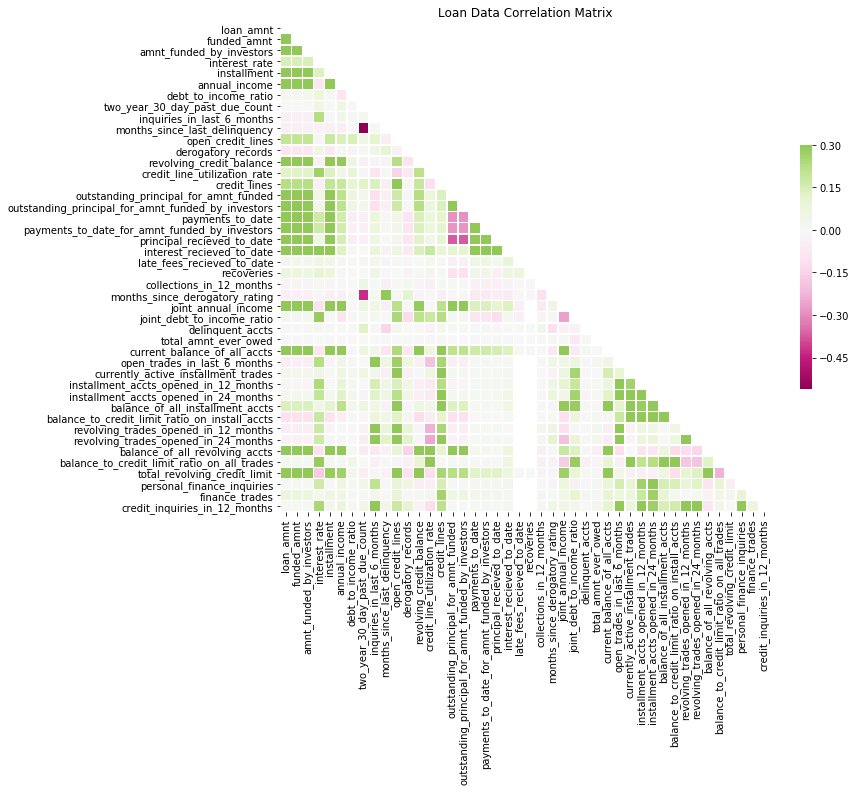

In [14]:
# Create data frame correlation
corr = correlation_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
cmap='PiYG'

# Labels
ax.set_title('Loan Data Correlation Matrix')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr, 
    mask=mask, 
    cmap=cmap, 
    vmax=.3, 
    center=0,
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .5}
).get_figure().savefig('correlation_matrix.png') # Save to a file

plt.show()